<a href="https://colab.research.google.com/github/sean-neary/Project-submission/blob/main/Sean_Neary_Assignment1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sean Neary
## C18733079
## Individual assignment using BostonHousing.csv

## imports

In [ ]:
%matplotlib inline
import csv
import pandas as pd
import numpy as np
import pandas.testing as tm
from sklearn import datasets
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from numpy import arange
import itertools
import time
import statsmodels.api as sm
from sklearn.preprocessing import scale 



## Getting the  Boston Housing data into df

In [ ]:
url='https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(url).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [ ]:
y = df.indus

X = df.drop(['indus'], axis=1).astype('float64')

In [ ]:
print(X)
      

        crim    zn  chas    nox     rm  ...    tax  ptratio       b  lstat  medv
0    0.00632  18.0   0.0  0.538  6.575  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   0.0  0.469  6.421  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   0.0  0.469  7.185  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   0.0  0.458  6.998  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   0.0  0.458  7.147  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...   ...    ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0   0.0  0.573  6.593  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0   0.0  0.573  6.120  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0   0.0  0.573  6.976  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0   0.0  0.573  6.794  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0   0.0  0.573  6.030  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 13 columns]


## Linear Regression

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [ ]:
predictions = lm.predict(X)
print(predictions[0:5])

[8.37456247 6.40485112 5.69182022 4.22297194 4.31626727]


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(predictions,y),mean_squared_error(predictions,y))

0.6658315969052871 11.764907362061878


In [ ]:
lm.intercept_

-5.052135068864779

In [ ]:
lm.coef_

array([-1.86339120e-02, -2.42461724e-02,  1.41312478e+00,  1.65888055e+01,
       -6.66711295e-01,  2.29002896e-04, -6.68222549e-01, -3.03651768e-01,
        2.69112188e-02,  2.86834972e-01, -1.55527059e-03,  6.86168547e-02,
        1.10469148e-02])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'age')

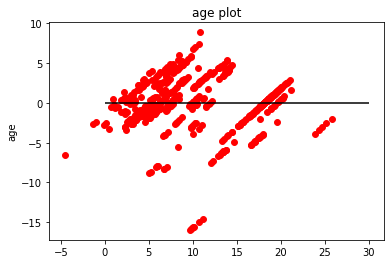

In [ ]:
plt.scatter(predictions, predictions-y, c='red', s = 35)
plt.hlines(y=0, xmin=0, xmax=30)
plt.title('age plot')
plt.ylabel('age')

In [ ]:
from sklearn import metrics

print('MAE: ' , metrics.mean_absolute_error(predictions,y))
print('Standard Deviation: ', np.std(predictions))

MAE:  2.4008816730468188
Standard Deviation:  5.933508437632695


## Forward & backwards Selection

### Forward

In [ ]:
%matplotlib inline
import pandas as pd
import pandas.testing as tm
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
def processSubset(feature_set):
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def forward(predictors):

    remaining_predictors = [p for p in X.columns if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []
for i in range(1,len(X.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 1 predictors in 0.06199789047241211 seconds.
Processed  12 models on 2 predictors in 0.037007808685302734 seconds.
Processed  11 models on 3 predictors in 0.03285360336303711 seconds.
Processed  10 models on 4 predictors in 0.045467376708984375 seconds.
Processed  9 models on 5 predictors in 0.04297471046447754 seconds.
Processed  8 models on 6 predictors in 0.041810035705566406 seconds.
Processed  7 models on 7 predictors in 0.02670145034790039 seconds.
Processed  6 models on 8 predictors in 0.0278012752532959 seconds.
Processed  5 models on 9 predictors in 0.025728225708007812 seconds.
Processed  4 models on 10 predictors in 0.025825023651123047 seconds.
Processed  3 models on 11 predictors in 0.026477336883544922 seconds.
Processed  2 models on 12 predictors in 0.014969348907470703 seconds.
Processed  1 models on 13 predictors in 0.015522241592407227 seconds.
Total elapsed time: 0.4967954158782959 seconds.


In [ ]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  indus   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              3304.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                   1.03e-223
Time:                        22:57:16   Log-Likelihood:                         -1507.6
No. Observations:                 506   AIC:                                      3017.
Df Residuals:                     505   BIC:                                      3021.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
def getBest(k):
    
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,3):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 13 models on 1 predictors in 0.036345720291137695 seconds.
Processed 78 models on 2 predictors in 0.21063733100891113 seconds.
Total elapsed time: 0.2561657428741455 seconds.


In [ ]:
print(models_best.loc[2, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                  indus   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              2144.
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                   3.47e-247
Time:                        22:58:08   Log-Likelihood:                         -1449.1
No. Observations:                 506   AIC:                                      2902.
Df Residuals:                     504   BIC:                                      2911.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Backwards

In [ ]:
def backward(predictors):
    
    tic = time.time()
    results = []
    for combo in itertools.combinations(predictors, len(predictors)-1):
        print(combo)
        results.append(processSubset(combo))
  
    models = pd.DataFrame(results)
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    return best_model

In [ ]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns
while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

('crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat')
('crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'medv')
('crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv')
('crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'b', 'lstat', 'medv')
('crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'ptratio', 'b', 'lstat', 'medv')
('crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat', 'medv')
('crim', 'zn', 'chas', 'nox', 'rm', 'age', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv')
('crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv')
('crim', 'zn', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv')
('crim', 'zn', 'chas', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv')
('crim', 'zn', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv')
('crim', 'chas'

In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[2, "model"].params)

------------
Best Subset:
------------
nox    27.978137
dis    -1.147192
dtype: float64


In [ ]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[3, "model"].params)

-----------------
Foward Selection:
-----------------
tax    0.017929
zn    -0.096856
nox    9.236173
dtype: float64


In [ ]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[2, "model"].params)

-------------------
Backward Selection:
-------------------
nox    27.978137
dis    -1.147192
dtype: float64


## Ridge regression

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [ ]:
alphas = 10**np.linspace(10,-2,100) *0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridge = Ridge(normalize = True)
coefs = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)    
np.shape(coefs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

(100, 13)

Text(0, 0.5, 'weights')

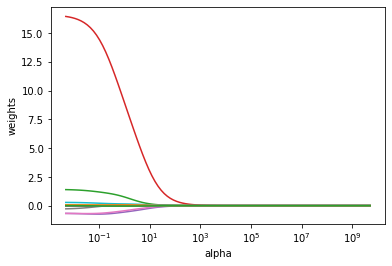

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)
pred2 = ridge2.predict(X_test)
print(pd.Series(ridge2.coef_, index = X.columns))
print(mean_squared_error(y_test, pred2))

crim       0.021209
zn        -0.015774
chas       0.254356
nox        4.903444
rm        -0.413725
age        0.015064
dis       -0.241311
rad        0.046081
tax        0.003478
ptratio    0.119903
b         -0.002550
lstat      0.049636
medv      -0.036688
dtype: float64
23.541921208874196


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
ridge3 = Ridge(alpha = 10**10, normalize =True)
ridge3.fit(X_train, y_train)             
pred3 = ridge3.predict(X_test)    
print(pd.Series(ridge3.coef_, index = X.columns))
print(mean_squared_error(y_test, pred3))

crim       3.033019e-11
zn        -1.555076e-11
chas       1.710094e-10
nox        4.307185e-09
rm        -4.369182e-10
age        1.532808e-11
dis       -2.220474e-10
rad        4.808900e-11
tax        3.019360e-12
ptratio    1.308492e-10
b         -2.868443e-12
lstat      5.504631e-11
medv      -4.033338e-11
dtype: float64
48.678653971952855


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)
pred = ridge2.predict(X_test)
print(pd.Series(ridge2.coef_, index = X.columns))
print(mean_squared_error(y_test, pred))

crim       -0.022112
zn         -0.049639
chas        1.002662
nox        14.279471
rm         -0.572633
age         0.001283
dis        -0.308034
rad        -0.352940
tax         0.033646
ptratio     0.096036
b          -0.002247
lstat       0.043249
medv       -0.004003
dtype: float64
15.600546426015864


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.005

In [ ]:
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


15.419259013891564

In [ ]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


crim       -0.020592
zn         -0.023460
chas        1.391687
nox        16.446387
rm         -0.678285
age         0.001182
dis        -0.675225
rad        -0.278824
tax         0.025622
ptratio     0.279360
b          -0.001530
lstat       0.066275
medv        0.006617
dtype: float64

In [ ]:
model = Ridge()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

results = search.fit(X, y)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -2.453
Config: {'alpha': 0.32}


## Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Text(0, 0.5, 'weights')

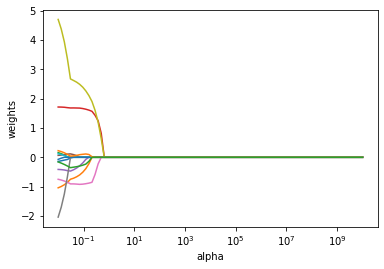

In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
model = Lasso()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

results = search.fit(X, y)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -2.453
Config: {'alpha': 0.01}


## Elastic Net

In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 2.653 (0.409)


## Gridseach 

In [ ]:
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

model = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X, y)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -2.453
Config: {'alpha': 0.001, 'l1_ratio': 0.34}


## PCR & PLS

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [ ]:
pca = PCA() 
X_reduced = pca.fit_transform(scale(X))
pd.DataFrame(pca.components_.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.263473,-0.029347,0.385062,0.098551,-0.000655,0.269169,0.814053,0.016582,0.037894,-0.137744,-0.038998,0.081831,0.087748
1,-0.257587,-0.153406,0.412944,0.345644,-0.123420,0.308808,-0.281486,-0.381169,0.410203,-0.240679,0.183455,-0.115750,-0.108436
2,-0.011466,0.409875,-0.145092,0.700899,0.536219,-0.151001,0.056337,-0.034360,-0.043779,-0.018375,0.013918,-0.047582,0.012689
3,0.337927,0.269806,-0.065617,0.052055,-0.193119,0.146266,-0.260133,0.115173,-0.135722,-0.531385,0.195335,0.571682,0.024619
4,-0.217784,0.440548,0.338690,-0.293658,0.010443,-0.125522,0.052861,-0.471943,-0.491675,0.009869,0.264830,-0.058059,0.028376
5,0.311691,0.276779,-0.225671,-0.081762,-0.143046,0.085359,-0.022993,-0.561379,0.185980,-0.023537,-0.620055,-0.065130,-0.036793
6,-0.308863,-0.373099,0.182879,0.187341,0.100539,-0.027304,-0.076752,-0.131442,-0.372947,0.041487,-0.493497,0.507508,0.144649
7,0.323713,0.065355,0.408200,-0.050895,0.231503,0.137904,-0.224608,0.174008,-0.109276,0.275480,-0.141091,0.042451,-0.677379
8,0.340492,0.033289,0.338843,-0.025368,0.161349,0.173928,-0.356573,0.149547,-0.078943,0.094731,-0.107204,-0.281286,0.675193
9,0.224069,-0.305330,0.009075,-0.340097,0.618455,-0.273851,-0.011364,-0.303055,0.280945,-0.193133,0.180191,0.202355,0.041458


In [ ]:
expLianedVariance=(pca.explained_variance_/pca.explained_variance_.sum())*100
expLianedVarianceCum=expLianedVariance.cumsum()
pd.DataFrame( expLianedVarianceCum, expLianedVariance)

,0
45.083896,45.083896
12.497031,57.580927
10.332002,67.912929
6.819060,74.731989
6.542913,81.274902
5.058688,86.333590
3.828875,90.162465
3.044578,93.207043
1.972108,95.179151
1.721367,96.900518


In [ ]:
expLianedVariance.size

13

(0.0, 4.0)

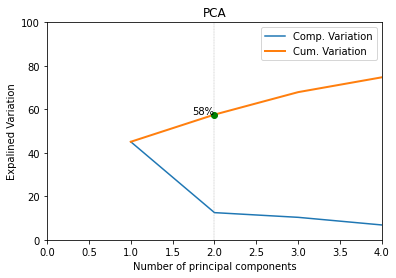

In [ ]:
xlabel=range(1, expLianedVariance.size+1)
xlabel=np.reshape( np.asarray(list(xlabel)), (13,))
N_PC_sel=2
variance_N_PC= expLianedVarianceCum[N_PC_sel-1]
plt.figure( )

plt.plot(list(xlabel),expLianedVariance, label='Comp. Variation')
plt.plot(list(xlabel),expLianedVarianceCum, label = 'Cum. Variation', linewidth=2)
plt.axvline(x=N_PC_sel, linestyle='dashed',linewidth=.3, color='grey')
plt.plot(N_PC_sel,variance_N_PC, color='green', marker='o')
plt.text(N_PC_sel,variance_N_PC,"{0:.0%}".format(variance_N_PC/100.0), horizontalalignment='right')
plt.legend()
plt.title('PCA')
plt.xlabel('Number of principal components')
plt.ylabel('Expalined Variation')
plt.ylim([0,100])
plt.xlim([0,4])

In [ ]:
pd.DataFrame(pca.components_.T).loc[:4,:5]

,0,1,2,3,4,5
0,0.263473,-0.029347,0.385062,0.098551,-0.000655,0.269169
1,-0.257587,-0.153406,0.412944,0.345644,-0.123420,0.308808
2,-0.011466,0.409875,-0.145092,0.700899,0.536219,-0.151001
3,0.337927,0.269806,-0.065617,0.052055,-0.193119,0.146266
4,-0.217784,0.440548,0.338690,-0.293658,0.010443,-0.125522


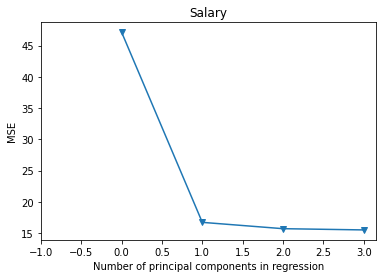

In [ ]:
from sklearn.model_selection import KFold
n = len(X_reduced)
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

score = -1*cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
for i in np.arange(1, 4):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
  
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([45.08, 57.58, 67.91, 74.73, 81.27, 86.33, 90.16, 93.2 , 95.17,
       96.89, 98.39, 99.43, 99.99])

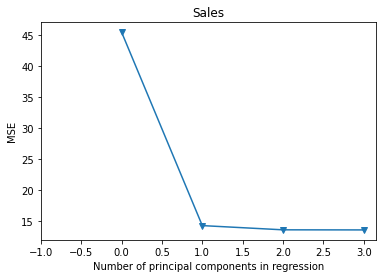

In [ ]:
pca2 = PCA()


X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)
kf_10 = KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 4):
    score = -1*cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sales')
plt.xlim(xmin=-1);

In [ ]:
X_reduced_test = pca2.transform(scale(X_test))[:,:7]


regr = LinearRegression()
regr.fit(X_reduced_train[:,:7], y_train)

pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

16.75099986418588

(-1.0, 3.1)

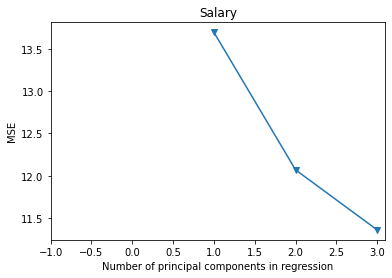

In [ ]:
n = len(X_train)


kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 4):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)


plt.plot(np.arange(1, 4), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [ ]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

15.683469217906405

## Cross-Validation

In [ ]:
print(X)

        crim    zn  chas    nox     rm  ...    tax  ptratio       b  lstat  medv
0    0.00632  18.0   0.0  0.538  6.575  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   0.0  0.469  6.421  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   0.0  0.469  7.185  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   0.0  0.458  6.998  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   0.0  0.458  7.147  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...   ...    ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0   0.0  0.573  6.593  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0   0.0  0.573  6.120  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0   0.0  0.573  6.976  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0   0.0  0.573  6.794  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0   0.0  0.573  6.030  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 13 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [ ]:
print(predictions[0:5])
print(y_test[0:5])

[ 5.92227678 10.96732339  7.22505798  5.94160586 11.37324179]
186     2.46
27      8.14
10      7.87
190     3.44
209    10.59
Name: indus, dtype: float64


Text(0, 0.5, 'Predictions')

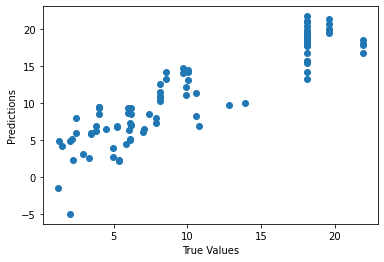

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
print ("Score:", model.score(X_test, y_test))

Score: 0.8222253780599523


## Comparing models 

Lin_R: -0.016342 (0.049052)
Lasso: -0.019521 (0.025725)
Ridge: -0.016341 (0.049050)
Elastic_net: -0.019547 (0.025826)


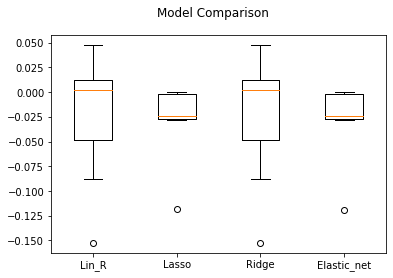

In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import explained_variance_score

url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
dataframe = pandas.read_csv(url).dropna()

array = dataframe.values
X = array[:,0:3]
Y = array[:,3]


seed = 7

models = []
models.append(('Lin_R', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))

models.append(('Elastic_net', ElasticNet()))




results = []
names = []

for name, model in models:
	kfold = model_selection.KFold(n_splits=20,shuffle= True ,random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()